In [4]:
import numpy as np
import collections
import csv
import cv2
import matplotlib.pyplot as plt
import os
import random
import pickle
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [5]:
%matplotlib inline
# path
im_path = 'img/'

In [6]:
def read_label():
    label = []
    tmp_label = []
    tmp_file_names = []
    with open('label.csv', 'r') as f:
        file = csv.reader(f, delimiter=',')
        tmp_label = [(row[0], row[1])for row in file]
        tmp_file_names = os.listdir(im_path)
    
    for name in tmp_file_names:
        for lb in tmp_label:
            if(lb[1] == name):
                label.append((int(lb[0]), lb[1]))
                break
    return label
                
    

In [7]:
im_files = os.listdir(im_path)

In [8]:
# read the label
labels = read_label()

In [9]:
# read the image 
training_data = []

for lb in labels:
    img = cv2.imread(im_path + lb[1])
    training_data.append([img, lb[0]])

In [10]:
random.shuffle(training_data)

In [11]:
x = []
y = []
for img, label in training_data:
    x.append(img)
    y.append(label)

X = np.array(x).reshape(-1, 640, 480, 3)

([<matplotlib.axis.XTick at 0x7fc9880d9c18>,
 <a list of 4 Text xticklabel objects>)

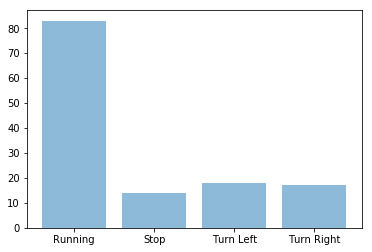

In [24]:
states = ['Running', 'Stop', 'Turn Left', 'Turn Right']
cnt = collections.Counter(y)
frequencies = [cnt[num] for num in cnt]
y_pos = np.arange(len(cnt))
plt.bar(y_pos, frequencies, align='center', alpha = 0.5)
plt.xticks(y_pos, states)


In [35]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y)


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


In [37]:
with open('img_data.pkl', 'wb') as f:
    pickle.dump(X, f)
    
with open('img_label.pkl', 'wb') as f:
    pickle.dump(dummy_y, f)    